# Spazzo il testo in frasi
Non mi interessa pulirle da caratteri strani, tanto devo solo cercare se vi compaiono i nomi dei personaggi

In [71]:
with open("HP1.txt") as file:
    text = file.read()
from nltk.tokenize import sent_tokenize
text = sent_tokenize(text)
print(text[:5])

["\n1\nHarry Potter and the Sorcerer's Stone\nCHAPTER ONE\nTHE BOY WHO LIVED\nMr. and Mrs. Dursley, of number four, Privet Drive, were proud to say\nthat they were perfectly normal, thank you very much.", "They were the last\npeople you'd expect to be involved in anything strange or mysterious,\nbecause they just didn't hold with such nonsense.", 'Mr. Dursley was the director of a firm called Grunnings, which made\ndrills.', 'He was a big, beefy man with hardly any neck, although he did\nhave a very large mustache.', 'Mrs. Dursley was thin and blonde and had\nnearly twice the usual amount of neck, which came in very useful as she\nspent so much of her time craning over garden fences, spying on the\nneighbors.']


# Definisco un dizionario di pseudonimi
Inserisco i principali personaggi ed associato ad ognuno di loro le stringe che li identificano nel testo.
Questo è fondamentale perché se usiamo i nomi ci sono ambiguità (ad esempio fratelli con lo stesso cognome), e perché alcuni personaggi hanno degli pseudonimi diversi dal nome (tu sai chi).

In [73]:
characters = {"Harry Potter" : ["harry"], "Ronald Weasley" : ["ron", "ronald"], 
              "Hermione Granger" : ["hermione", "granger"], "Rubeus Hagrid" : ["rubeus", "hagrid"],
              "Albus Dumbledore" : ["albus", "dumbledore"], "Draco Malfoy" : ["draco"],
              "Minerva McGonagall" : ["minerva", "mcgonagall"], "Severus Snape" : ["severus", "snape"],
              "Ginny Weasley" : ["ginny"], "Lucius Malfoy" : ["lucius"], "Vernon Dursley" : ["vernon"],
              "Petunia Dursley" : ["petunia"], "Dudley Dursley" : ["dudley"], "Arthur Weasley" : ["arthur"], 
              "Molly Weasley" : ["molly"], "Trelawney" : ["trelawney"],
              "Neville Longbottom" : ["neville"], "Fred Weasley" : ["fred"], 
              "George Weasley" : ["george"], "Lord Voldemort" : ["voldemort", "you-know-who", "you know who"], 
              "Argus Filch" : ["argus", "filch"], "Bill Weasley" : ["bill"], "Ollivander" : ["ollivander"],
              "Sprout" : ["sprout"], "Percy Weasley" : ["percy"], "Charlie Weasley" : ["charlie"],
              "Oliver Wood" : ["oliver", "wood"], "Seamus Finnigan" : ["seamus", "finnigan"],
              "Vincent Crabbe" : ["vincent", "crabbe"], "Gregory Goyle" : ["gregory", "goyle"], 
              "Marcus Flint" : ["marcus", "flint"], "James Potter" : ["james"], "Lily Evans" : ["lily", "evans"],
              "Rolanda Hooch" : ["rolanda", "hooch"], "Filius Flitwick" : ["filius", "flitwick"], "Quirrell" : ["quirrell"]}

## Controllo e rimuovo eventuali personaggi non presenti nel libro

In [74]:
to_be_deleted = [character for character, names in characters.items() if sum([name in " ".join(text).lower() for name in names]) == 0]
print(to_be_deleted)

['Lucius Malfoy', 'Arthur Weasley', 'Molly Weasley', 'Trelawney']


In [75]:
[characters.pop(key) for key in to_be_deleted]
print([character for character, names in characters.items() if sum([name in " ".join(text).lower() for name in names]) == 0])

[]


# Creo la sociomatrice
Fortunatamente gira in 1 secondo, quindi se serve possiamo fare questo per moli di dati anche più grandi, ad esempio includere tutti i libri (ammesso che si trovino online)

In [76]:
import numpy as np
import itertools 

n = len(characters.keys())
textlength = len(text)
sociomatrix = np.zeros((n,n))
characters_array = np.array(list(characters.keys()))

for i, sentence in enumerate(text):
    characters_in_sentence = set()
    sentence = sentence.lower()
    for c, names in characters.items():
        for name in names:
            if name in sentence:
                characters_in_sentence.add(c)
    for subset in itertools.combinations(characters_in_sentence, 2):
        i = np.argwhere(subset[0] == characters_array)
        j = np.argwhere(subset[1] == characters_array)
        sociomatrix[i, j] += 1
        sociomatrix[j, i] += 1
        
    print(f"{np.round(i*100/textlength, 2)}% done", end="\r")

In [77]:
import pandas as pd
pd.DataFrame(sociomatrix, columns= characters_array, index=characters_array)

,Harry Potter,Ronald Weasley,Hermione Granger,Rubeus Hagrid,Albus Dumbledore,Draco Malfoy,Minerva McGonagall,Severus Snape,Ginny Weasley,Vernon Dursley,...,Oliver Wood,Seamus Finnigan,Vincent Crabbe,Gregory Goyle,Marcus Flint,James Potter,Lily Evans,Rolanda Hooch,Filius Flitwick,Quirrell
Harry Potter,0.0,178.0,82.0,75.0,24.0,3.0,18.0,36.0,0.0,28.0,...,18.0,9.0,5.0,6.0,5.0,1.0,1.0,0.0,2.0,25.0
Ronald Weasley,178.0,0.0,81.0,31.0,7.0,0.0,9.0,16.0,1.0,2.0,...,2.0,2.0,3.0,4.0,0.0,1.0,1.0,1.0,3.0,6.0
Hermione Granger,82.0,81.0,0.0,11.0,2.0,1.0,3.0,11.0,0.0,1.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0
Rubeus Hagrid,75.0,31.0,11.0,0.0,10.0,0.0,5.0,8.0,0.0,2.0,...,2.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
Albus Dumbledore,24.0,7.0,2.0,10.0,0.0,0.0,10.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,2.0,1.0
Draco Malfoy,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
Minerva McGonagall,18.0,9.0,3.0,5.0,10.0,0.0,0.0,6.0,0.0,0.0,...,3.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,3.0,3.0
Severus Snape,36.0,16.0,11.0,8.0,2.0,0.0,6.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,4.0,9.0
Ginny Weasley,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Vernon Dursley,28.0,2.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


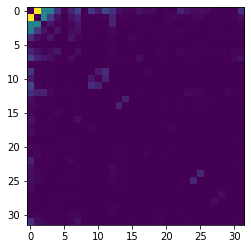

In [63]:
import matplotlib.pyplot as plt

plt.imshow(sociomatrix)